# NOI: Zufallsprozesse und Quantisierung im Frequenzbereich #
## Quantization ##

Dieses Notebook zeigt den Einfluss verschiedener Quantisierungs- und Überlaufsoptionen auf die Wahrscheinlichkeitsdichtefunktion des Rauschens.

In [10]:
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt
from scipy.stats import norm
import scipy.signal as sig

figsize = {"figsize":(15,10)}

Spielen Sie mit dem Skript herum, ändern Sie das Eingangssignal und die Quantisierungseinstellungen und versuchen Sie den Code (ggf. mit Hilfe der Hinweise im vorigen Kapitel) nachzuvollziehen.

Durch das Einkommentieren der Option `%matplotlib notebook` in der folgenden Zelle erhalten Sie einen interaktiven Plot (mit gewissen Einschränkungen).

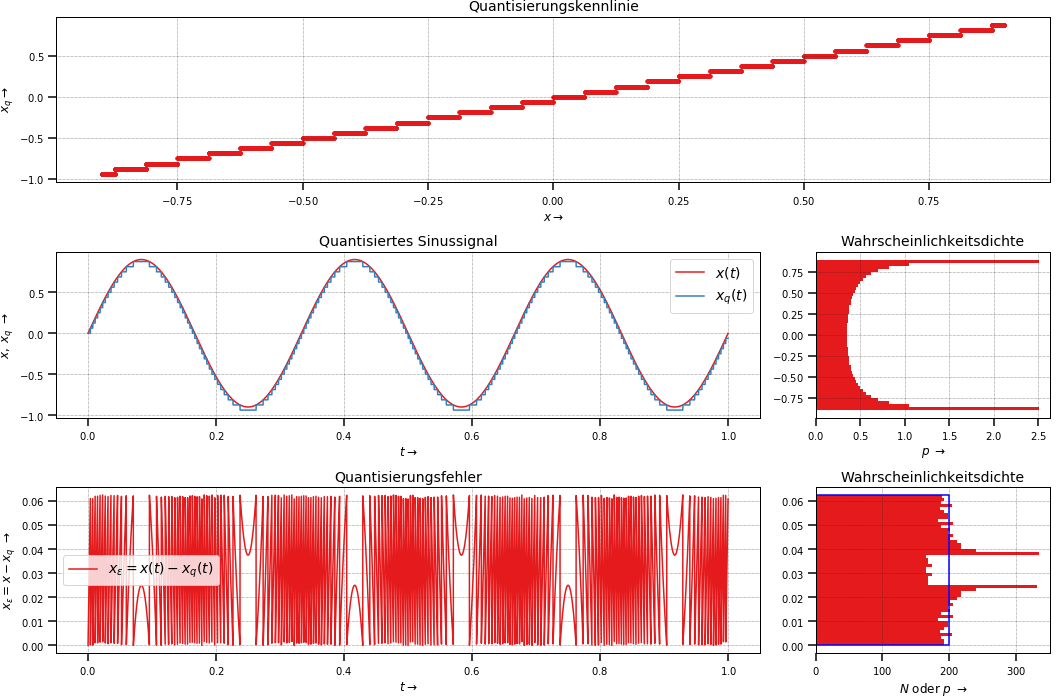

In [11]:
#%matplotlib notebook
N = 10000
N_bins = 50
t = linspace(0, 1, N, endpoint=False)
x = sin(2*pi*t*3)*0.9
#x = np.random.rand(len(t))*0.9
r = np.random.randn(N)

q_obj = {'WI':0, 'WF': 4, 'quant':'floor', 'ovfl': 'sat'} # try 'round' ; 'sat'

Q1 = fx.Fixed(q_obj)

x_q = Q1.fixp(x) # quantize x
x_eps = x - x_q # quantization error
#

fig1 = plt.figure(1, **figsize)
gs = gridspec.GridSpec(3, 2, width_ratios=[3, 1]) 
ax10 = plt.subplot(gs[0,:])
ax10.set_title('Quantisierungskennlinie')
#ax10.step(x,x_q, where = 'post')
ax10.scatter(x,x_q, s=10)
ax10.set_xlabel(r'$x \rightarrow$')
ax10.set_ylabel(r'$x_q \rightarrow$');
ax11 = plt.subplot(gs[1,0])
ax11.set_title('Quantisiertes Sinussignal')
ax11.plot(t, x, label = r'$x(t)$')
ax11.plot(t, x_q, label = r'$x_q(t)$')
ax11.legend(fontsize = 14)
ax11.set_xlabel(r'$t \rightarrow$'); ax11.set_ylabel(r'$x, \;x_q \; \rightarrow$')
ax12= plt.subplot(gs[1,1])
ax12.set_title("Wahrscheinlichkeitsdichte")
ax12.hist(x, bins=N_bins,  
                       density=True, # True: probability density, False: absolute Zahlen
                       weights=None, cumulative=False, bottom=None, histtype=u'bar', 
                       align=u'mid', orientation=u'horizontal', rwidth=None, log=False, 
                       color=None, label=None, stacked=False)
ax12.set_xlabel(r"$p\;\rightarrow$")
ax13 = plt.subplot(gs[2,0])
ax13.set_title('Quantisierungsfehler')
ax13.plot(t, x_eps, label = r'$x_{\epsilon} = x(t) - x_q(t)$')
ax13.set_ylabel(r'$x_{\epsilon} = x - x_q \; \rightarrow$')
ax13.legend(fontsize = 14)
ax13.set_xlabel(r'$t \rightarrow$');
ax14= plt.subplot(gs[2,1])
ax14.set_title("Wahrscheinlichkeitsdichte")
ax14.hist(x_eps, bins=N_bins, 
                       #range=(0, Q1.LSB), 
                       density=False, # True: probability density, False: absolute Zahlen
                       weights=None, 
                       cumulative=False, 
                       bottom=None, 
                       histtype=u'bar', 
                       align=u'mid', 
                       orientation=u'horizontal', 
                       rwidth=None, 
                       log=False, 
                       color=None, 
                       label=None, 
                       stacked=False)
ax14.plot([0, N/N_bins, N/N_bins, 0],[0,0,Q1.LSB,Q1.LSB], 'b-')# Absolute Zahlen
#ax14.plot([0, 1/Q1.LSB, 1/Q1.LSB, 0],[0,0,Q1.LSB,Q1.LSB], 'b-') # Probability Density
ax14.set_xlabel(r"$N$ oder $p\;\rightarrow$");
fig1.tight_layout()

## Fragen und Experimente ##

- Können Sie aus der Quantisierungskennlinie erkennen, welche Art der Requantisierung und ob Sättigungslogik verwendet wurde? Und aus dem Plot des quantisierten Signals?
- Warum ist die Wahrscheinlichkeitsdichte bei Übersteuerung alles andere als gleichverteilt? Warum ist das auch bei wenigen Bits Wortlänge so?
- Was passiert, wenn Sie den Quantisierer übersteuern? Vergleichen Sie die Optionen `'sat'` und `'wrap'`.
- Welchen Einfluss auf das Quantisierungsrauschen haben die Quantisierungsmethoden, also z.B. `'floor'`, `'round'` und `'fix'`? Schauen Sie sich dabei auch den DC-Wert des Spektrums an.

***
**Copyright**

(c) 2016 - 2019 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2019*.